# 🚀 複素演算によるCQT理論の深化解析

## Complex Operations for Advanced CQT Theory Analysis

このノートブックでは、複素演算を活用してCQT理論を深化させ、量子測定の数学的構造を詳細に解析します：

1. **複素演算の理論的基礎** - W字軌跡の数学的特性
2. **瞬間的物理量の計算** - 複素速度・加速度・曲率
3. **W字パターンの特徴抽出** - 巻き数・フラクタル次元・複素モーメント
4. **フーリエ解析とスペクトル特性** - 周波数域での軌跡分析
5. **複素エラー検出システム** - 位相デコヒーレンス・振幅異常検出
6. **複素相関と量子もつれ検出** - 軌跡間の相関解析
7. **幾何学的不変量と形状解析** - 軌跡の幾何学的特性
8. **実量子データでの検証** - IBM Quantum Volumeデータ解析
9. **結論と新発見** - 複素演算がもたらした洞察

In [13]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# scipyのインポート（フーリエ解析用）
try:
    from scipy import signal as sp_signal
    print("✓ Scipy imported successfully")
except ImportError as e:
    print(f"⚠ Scipy import error: {e}")
    print("Installing scipy...")
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--user', 'scipy'])
    try:
        from scipy import signal as sp_signal
        print("✓ Scipy installed and imported successfully")
    except ImportError:
        print("⚠ Scipy installation failed - スペクトログラム機能は利用できません")

# プロジェクトパスの設定
sys.path.append('../src')
sys.path.append('../data_collection')

# カスタムモジュールのインポート
try:
    from complex_cqt_operations import ComplexCQTAnalyzer, run_complex_analysis, visualize_complex_analysis
    from complex_error_detection import ComplexErrorDetector, compute_complex_correlation, detect_quantum_entanglement
    from cqt_tracker_v3 import OptimizedCQTTracker
    print("✓ 複素演算CQTモジュール読み込み完了")
except ImportError as e:
    print(f"⚠ モジュール読み込みエラー: {e}")
    print("src/complex_cqt_operations.py と src/complex_error_detection.py が必要です")

# プロット設定
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("📚 複素演算CQT解析ノートブック準備完了！")
print(f"実行開始時刻: {datetime.now()}")

✓ Scipy imported successfully
✓ 複素演算CQTモジュール読み込み完了
📚 複素演算CQT解析ノートブック準備完了！
実行開始時刻: 2025-06-17 00:35:50.227777


## 1. 複素演算の理論的基礎

### CQT理論の複素数拡張

従来のCQT理論では量子測定を複素数として表現していましたが、さらに進んで**複素軌跡の微分幾何学的性質**を解析します。

$$z(t) = x(t) + iy(t)$$

ここで：
- $x(t)$: 測定の方向性（相関の強さ）
- $y(t)$: 測定の不確実性

### 新しい複素演算指標

1. **複素速度**: $v(t) = \frac{dz}{dt}$
2. **複素加速度**: $a(t) = \frac{d^2z}{dt^2}$
3. **複素曲率**: $\kappa(t) = \frac{\text{Im}(a \cdot \overline{v})}{|v|^3}$
4. **巻き数**: $W = \frac{1}{2\pi} \oint \frac{dz}{z}$
5. **フラクタル次元**: ボックスカウント法による推定

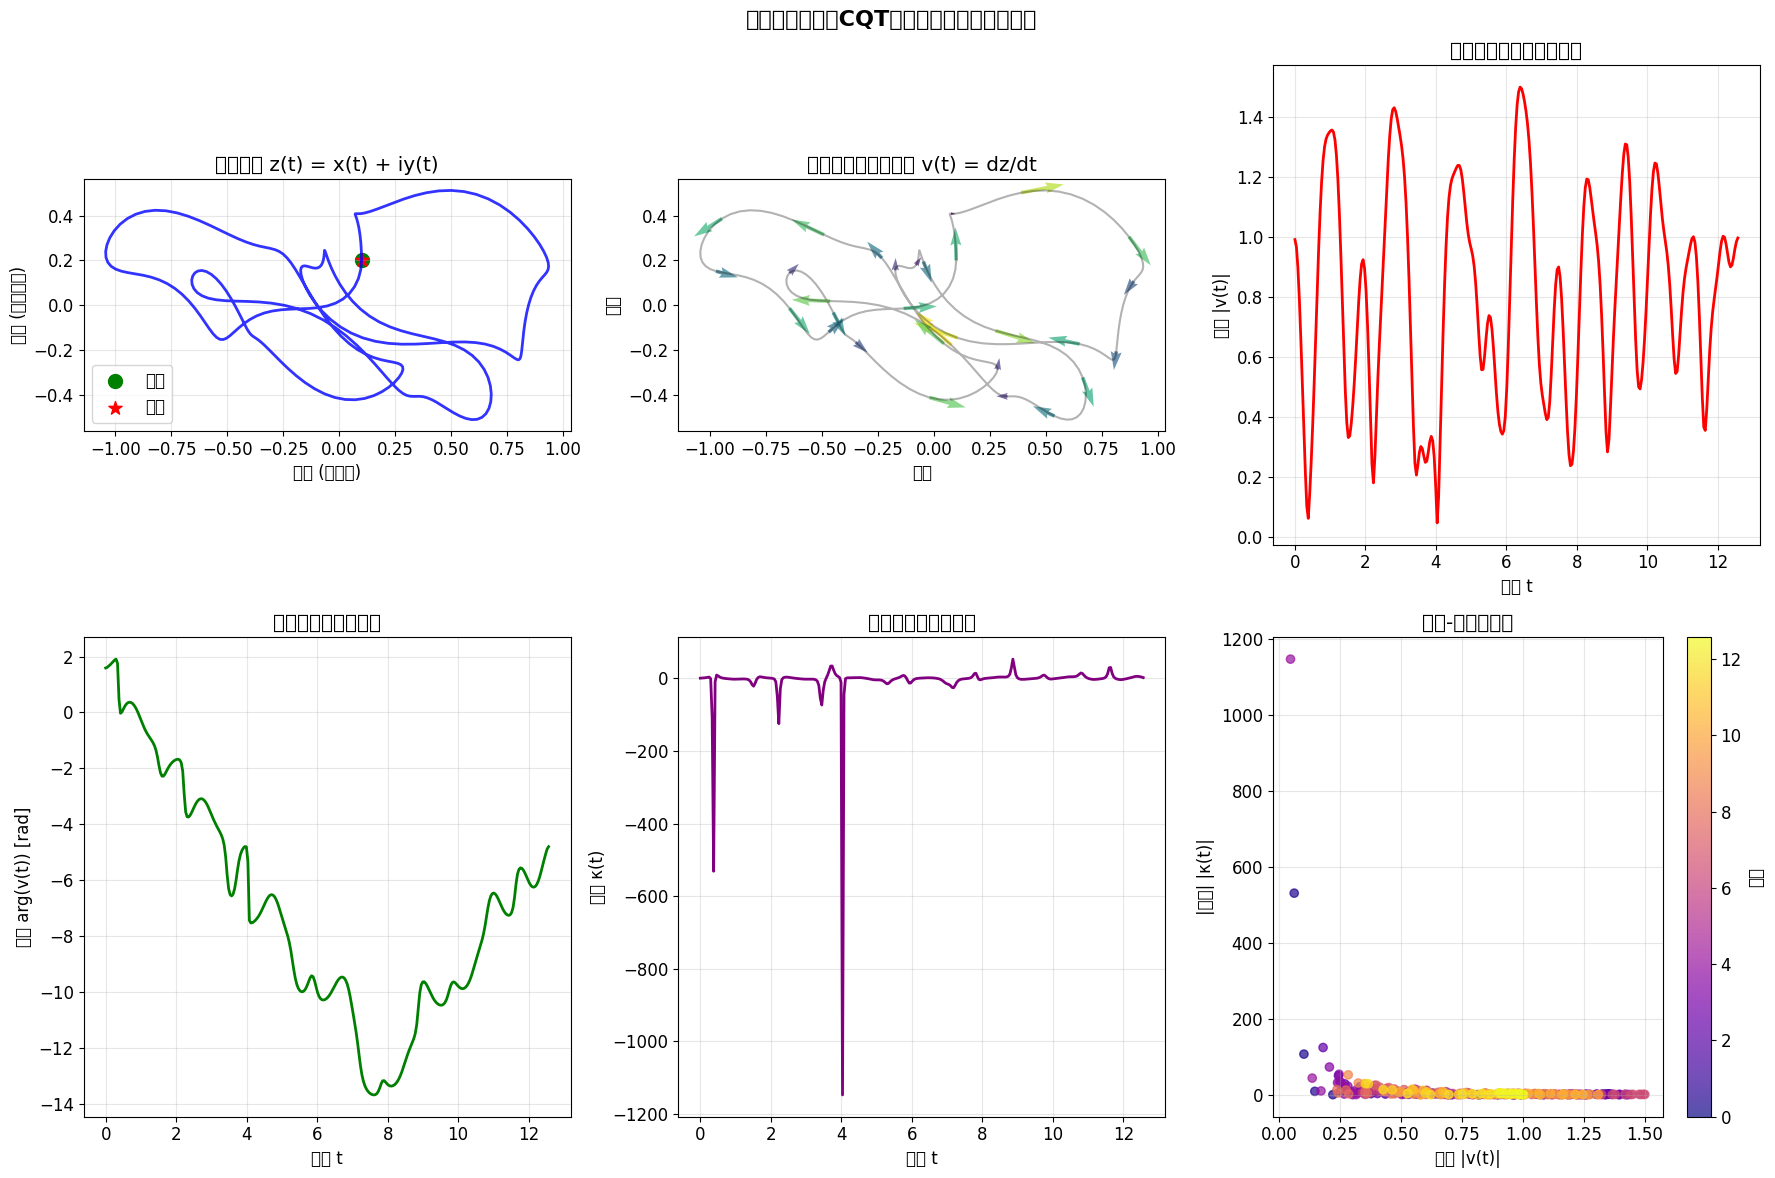

=== 複素演算統計 ===
平均速度: 0.8070
最大速度: 1.4997
平均曲率: 12.0591
最大曲率: 1147.1795
軌跡の総長: 10.1750


In [14]:
# 複素演算の基本概念デモンストレーション
def demonstrate_complex_operations():
    """複素演算の基本概念を視覚的に説明"""
    
    # サンプル複素軌跡の生成（螺旋状のW字パターン）
    t = np.linspace(0, 4*np.pi, 300)
    
    # W字の基本形状
    real_part = np.sin(t) * np.sin(3*t/4) + 0.1*np.cos(5*t)
    imag_part = 0.3 * np.sin(2*t) + 0.2 * np.cos(t/2) + 0.05*np.sin(8*t)
    
    # 複素軌跡
    z_trajectory = real_part + 1j * imag_part
    
    # 複素微分の計算
    dt = t[1] - t[0]
    velocity = np.gradient(z_trajectory) / dt
    acceleration = np.gradient(velocity) / dt
    
    # 速度の大きさと方向
    speed = np.abs(velocity)
    direction = np.angle(velocity)
    
    # 曲率の計算
    curvature = np.zeros_like(speed)
    non_zero = speed > 1e-10
    curvature[non_zero] = np.imag(acceleration[non_zero] * np.conj(velocity[non_zero])) / (speed[non_zero]**3)
    
    # 可視化
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. 複素軌跡
    ax = axes[0, 0]
    ax.plot(z_trajectory.real, z_trajectory.imag, 'b-', linewidth=2, alpha=0.8)
    ax.scatter(z_trajectory[0].real, z_trajectory[0].imag, color='green', s=100, marker='o', label='開始')
    ax.scatter(z_trajectory[-1].real, z_trajectory[-1].imag, color='red', s=100, marker='*', label='終了')
    ax.set_xlabel('実部 (方向性)')
    ax.set_ylabel('虚部 (不確実性)')
    ax.set_title('複素軌跡 z(t) = x(t) + iy(t)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # 2. 速度ベクトル場
    ax = axes[0, 1]
    # サンプリング
    step = 10
    ax.quiver(z_trajectory[::step].real, z_trajectory[::step].imag, 
              velocity[::step].real, velocity[::step].imag, 
              speed[::step], cmap='viridis', alpha=0.7)
    ax.plot(z_trajectory.real, z_trajectory.imag, 'k-', alpha=0.3)
    ax.set_xlabel('実部')
    ax.set_ylabel('虚部')
    ax.set_title('複素速度ベクトル場 v(t) = dz/dt')
    ax.set_aspect('equal')
    
    # 3. 速度の大きさ
    ax = axes[0, 2]
    ax.plot(t, speed, 'r-', linewidth=2)
    ax.set_xlabel('時間 t')
    ax.set_ylabel('速度 |v(t)|')
    ax.set_title('速度の大きさの時間変化')
    ax.grid(True, alpha=0.3)
    
    # 4. 方向の変化
    ax = axes[1, 0]
    ax.plot(t, np.unwrap(direction), 'g-', linewidth=2)
    ax.set_xlabel('時間 t')
    ax.set_ylabel('方向 arg(v(t)) [rad]')
    ax.set_title('速度方向の時間変化')
    ax.grid(True, alpha=0.3)
    
    # 5. 曲率
    ax = axes[1, 1]
    ax.plot(t, curvature, 'purple', linewidth=2)
    ax.set_xlabel('時間 t')
    ax.set_ylabel('曲率 κ(t)')
    ax.set_title('複素曲率の時間変化')
    ax.grid(True, alpha=0.3)
    
    # 6. 位相図
    ax = axes[1, 2]
    scatter = ax.scatter(speed, np.abs(curvature), c=t, cmap='plasma', alpha=0.7)
    ax.set_xlabel('速度 |v(t)|')
    ax.set_ylabel('|曲率| |κ(t)|')
    ax.set_title('速度-曲率位相図')
    plt.colorbar(scatter, ax=ax, label='時間')
    ax.grid(True, alpha=0.3)
    
    plt.suptitle('複素演算によるCQT軌跡の微分幾何学的解析', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 統計情報
    print("=== 複素演算統計 ===")
    print(f"平均速度: {np.mean(speed):.4f}")
    print(f"最大速度: {np.max(speed):.4f}")
    print(f"平均曲率: {np.mean(np.abs(curvature)):.4f}")
    print(f"最大曲率: {np.max(np.abs(curvature)):.4f}")
    print(f"軌跡の総長: {np.sum(speed * dt):.4f}")
    
    return z_trajectory

# デモンストレーション実行
demo_trajectory = demonstrate_complex_operations()

## 2. 実データでの複素演算解析

既存の量子データから複素軌跡を生成し、高度な複素演算解析を実行します。

In [15]:
# 実データから複素軌跡を生成
def load_quantum_trajectories():
    """既存の量子データから複素軌跡を読み込み"""
    trajectories = {}
    
    # 1. Bell状態データ
    bell_data_path = '../data_collection/collected_data/bell_states/bell_measurement_data.csv'
    
    if os.path.exists(bell_data_path):
        print("Bell状態データから複素軌跡を生成...")
        bell_data = pd.read_csv(bell_data_path)
        
        # 最初のBell状態のみ使用
        row = bell_data.iloc[0]
        state = row['state']
        counts_str = row['counts']
        
        # countsの解析
        import ast
        counts_str = counts_str.replace("np.str_('" , "'").replace("np.int64(", "").replace("')", "'").replace(")", "")
        counts = ast.literal_eval(counts_str)
        
        # CQT軌跡の生成
        tracker = OptimizedCQTTracker(system_dim=2)
        
        for outcome_str, count in counts.items():
            for _ in range(min(count // 5, 100)):  # サンプリング
                outcome = int(outcome_str[0])
                tracker.add_measurement(outcome)
        
        if tracker.trajectory:
            trajectories[f'bell_{state}'] = tracker.trajectory
    
    # 2. IBM Quantum Volumeデータ
    qv_data_path = '../data_collection/downloaded_quantum_data/IBM_Quantum_Volume/qiskit-experiments/qiskit-experiments-main/test/library/quantum_volume'
    
    qv_files = {
        'qv_high_noise': 'qv_data_high_noise.json',
        'qv_moderate': 'qv_data_moderate_noise_100_trials.json',
        'qv_standard': 'qv_data_70_trials.json'
    }
    
    for label, filename in qv_files.items():
        filepath = os.path.join(qv_data_path, filename)
        
        if os.path.exists(filepath):
            with open(filepath, 'r') as f:
                data = json.load(f)
            
            # 最初の試行のみ使用
            if data and 'counts' in data[0]:
                tracker = OptimizedCQTTracker(system_dim=2)
                counts = data[0]['counts']
                
                for bitstring, count in counts.items():
                    for _ in range(min(count, 30)):
                        outcome = int(bitstring[0]) if bitstring else 0
                        tracker.add_measurement(outcome)
                
                if tracker.trajectory:
                    trajectories[label] = tracker.trajectory
                    print(f"{label}: {len(tracker.trajectory)}点の軌跡")
    
    # 3. 合成W字パターン
    print("合成W字パターンを生成...")
    t = np.linspace(0, 4*np.pi, 250)
    real_part = np.sin(t) * np.sin(3*t/4) + 0.15*np.random.normal(0, 1, len(t))
    imag_part = 0.3 * np.sin(2*t) + 0.2 * np.cos(t/2) + 0.1*np.random.normal(0, 1, len(t))
    w_trajectory = real_part + 1j * imag_part
    trajectories['synthetic_w_pattern'] = w_trajectory
    
    print(f"\n総軌跡数: {len(trajectories)}")
    return trajectories

# 軌跡データの読み込み
quantum_trajectories = load_quantum_trajectories()

Bell状態データから複素軌跡を生成...
qv_high_noise: 480点の軌跡
qv_moderate: 403点の軌跡
qv_standard: 204点の軌跡
合成W字パターンを生成...

総軌跡数: 5


## 3. W字パターンの特徴抽出

各軌跡に対して複素演算解析を実行し、W字パターンの数学的特徴を抽出します。

In [16]:
# 軌跡の複素演算解析
analysis_results = {}
feature_summary = []

print("=== 複素演算解析開始 ===")

for name, trajectory in quantum_trajectories.items():
    print(f"\n--- {name} の解析中 ---")
    
    try:
        # ComplexCQTAnalyzerで解析
        analyzer = ComplexCQTAnalyzer(trajectory)
        
        # 各種解析の実行
        instant_props = analyzer.compute_instantaneous_properties()
        w_features = analyzer.analyze_w_pattern()
        fourier = analyzer.fourier_analysis()
        transitions = analyzer.detect_phase_transitions()
        invariants = analyzer.calculate_geometric_invariants()
        quantum_states = analyzer.quantum_state_reconstruction()
        
        # 結果の保存
        analysis_results[name] = {
            'analyzer': analyzer,
            'instant_props': instant_props,
            'w_features': w_features,
            'fourier': fourier,
            'transitions': transitions,
            'invariants': invariants,
            'quantum_states': quantum_states
        }
        
        # 特徴量のサマリー
        feature_summary.append({
            'name': name,
            'length': len(trajectory),
            'mean_speed': np.mean(instant_props['speed']),
            'max_acceleration': np.max(np.abs(instant_props['acceleration'])),
            'winding_number': w_features['winding_number'],
            'fractal_dimension': w_features['fractal_dimension'],
            'spectral_entropy': fourier['spectral_entropy'],
            'total_length': invariants['total_length'],
            'enclosed_area': invariants['enclosed_area'],
            'asymmetry': invariants['asymmetry'],
            'num_transitions': len(transitions['all_transitions'])
        })
        
        # 主要統計の表示
        print(f"  軌跡長: {len(trajectory)}")
        print(f"  平均速度: {np.mean(instant_props['speed']):.4f}")
        print(f"  巻き数: {w_features['winding_number']:.3f}")
        print(f"  フラクタル次元: {w_features['fractal_dimension']:.3f}")
        print(f"  スペクトルエントロピー: {fourier['spectral_entropy']:.3f}")
        print(f"  相転移点数: {len(transitions['all_transitions'])}")
        
    except Exception as e:
        print(f"  エラー: {e}")

print("\n=== 解析完了 ===")

=== 複素演算解析開始 ===

--- bell_phi_plus の解析中 ---
  軌跡長: 200
  平均速度: 0.0190
  巻き数: -0.423
  フラクタル次元: 0.173
  スペクトルエントロピー: 1.706
  相転移点数: 8

--- qv_high_noise の解析中 ---
  軌跡長: 480
  平均速度: 0.0494
  巻き数: -0.423
  フラクタル次元: 0.172
  スペクトルエントロピー: 2.852
  相転移点数: 33

--- qv_moderate の解析中 ---
  軌跡長: 403
  平均速度: 0.0418
  巻き数: -0.423
  フラクタル次元: 0.178
  スペクトルエントロピー: 2.775
  相転移点数: 34

--- qv_standard の解析中 ---
  軌跡長: 204
  平均速度: 0.0676
  巻き数: -0.071
  フラクタル次元: 0.166
  スペクトルエントロピー: 2.456
  相転移点数: 20

--- synthetic_w_pattern の解析中 ---
  軌跡長: 250
  平均速度: 0.2275
  巻き数: 0.107
  フラクタル次元: 0.597
  スペクトルエントロピー: 2.471
  相転移点数: 87

=== 解析完了 ===


=== 軌跡特徴量比較テーブル ===
                  name  length  mean_speed  max_acceleration  winding_number  \
0        bell_phi_plus     200      0.0190            0.4800         -0.4230   
1        qv_high_noise     480      0.0494            0.4800         -0.4230   
2          qv_moderate     403      0.0418            0.4800         -0.4230   
3          qv_standard     204      0.0676            0.4800         -0.0706   
4  synthetic_w_pattern     250      0.2275            0.9406          0.1074   

   fractal_dimension  spectral_entropy  total_length  enclosed_area  \
0             0.1735            1.7056        3.7897         0.9373   
1             0.1718            2.8524       23.6477         0.9373   
2             0.1776            2.7755       16.7983         0.7773   
3             0.1662            2.4561       13.7187         0.4800   
4             0.5965            2.4708       56.6586         0.7243   

   asymmetry  num_transitions  
0     0.9275                8  
1     0.

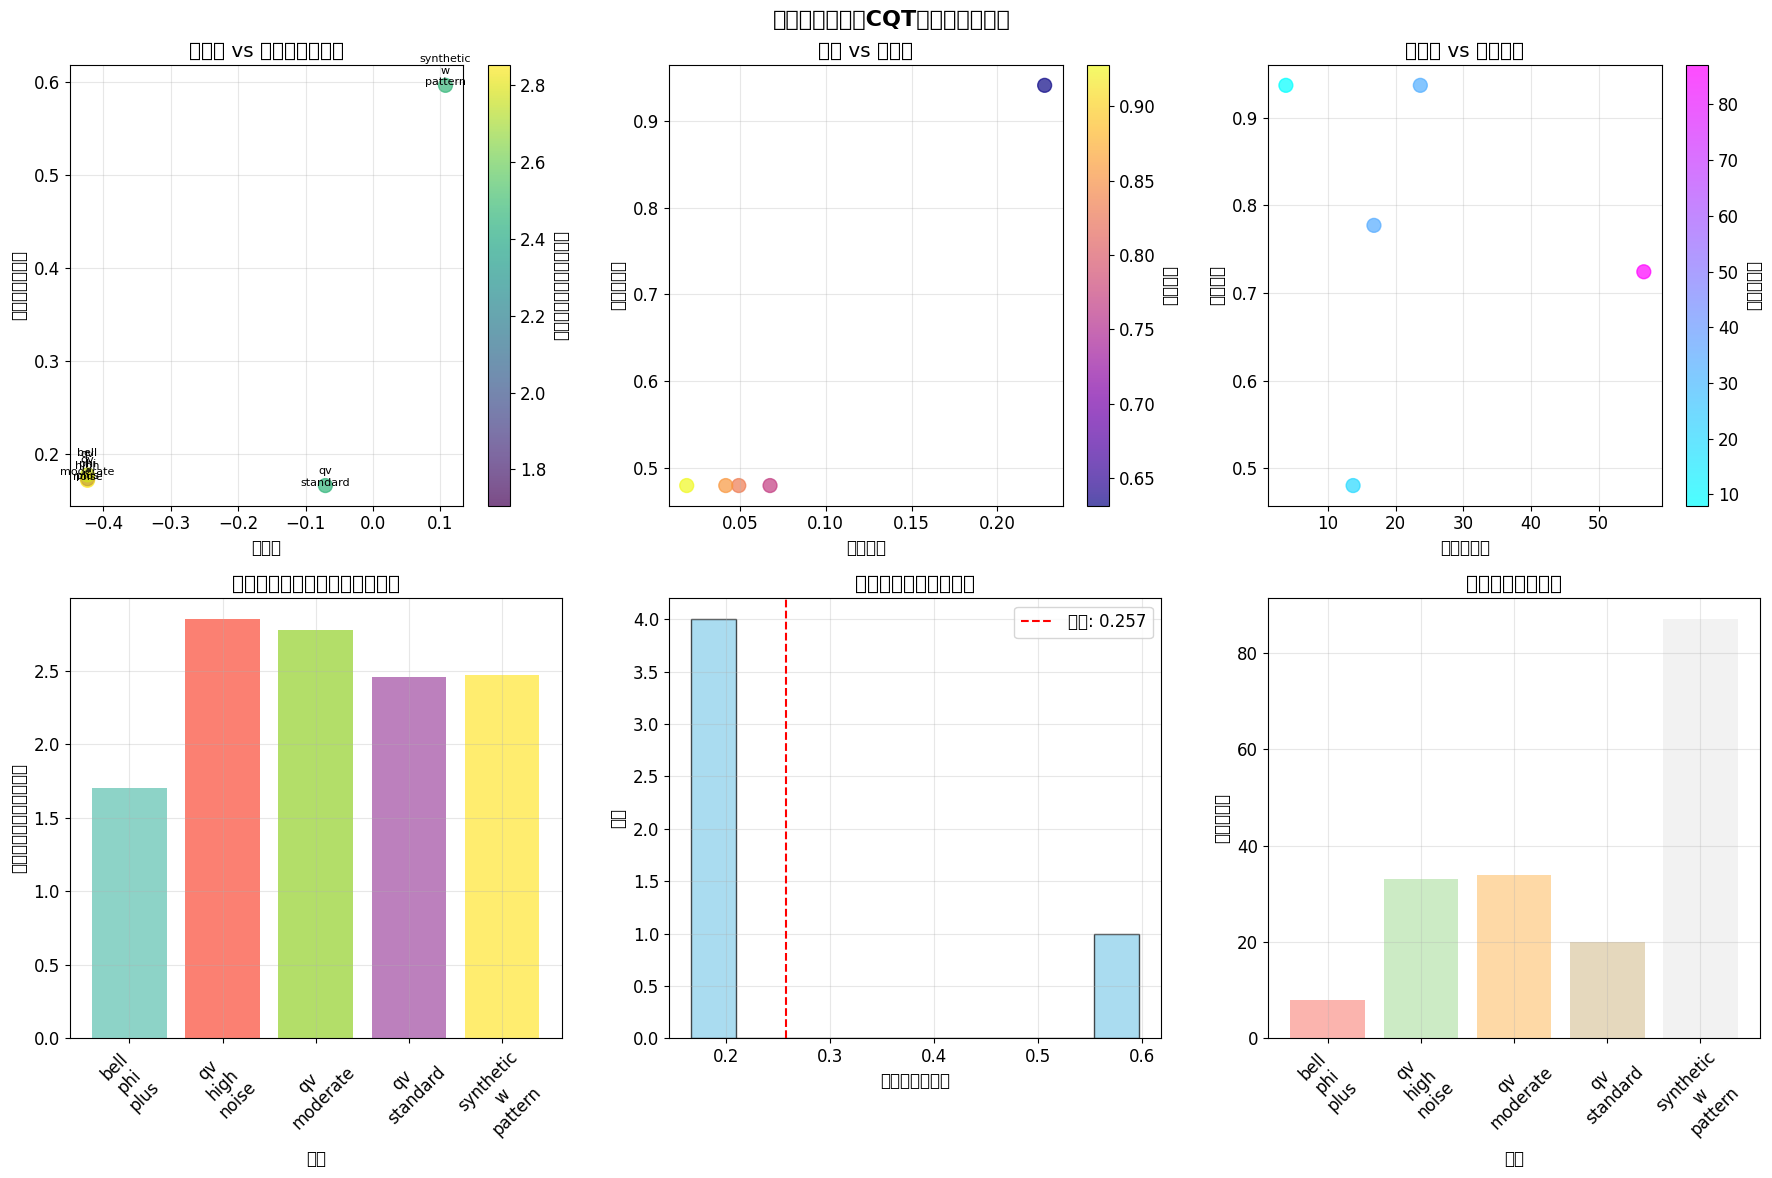


特徴量データをcomplex_cqt_features.csvに保存しました


In [17]:
# 特徴量比較テーブルの作成と可視化
feature_df = pd.DataFrame(feature_summary)

print("=== 軌跡特徴量比較テーブル ===")
print(feature_df.round(4))

# 特徴量の可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 巻き数 vs フラクタル次元
ax = axes[0, 0]
scatter = ax.scatter(feature_df['winding_number'], feature_df['fractal_dimension'], 
                    c=feature_df['spectral_entropy'], s=100, alpha=0.7, cmap='viridis')
plt.colorbar(scatter, ax=ax, label='スペクトルエントロピー')
ax.set_xlabel('巻き数')
ax.set_ylabel('フラクタル次元')
ax.set_title('巻き数 vs フラクタル次元')
for i, name in enumerate(feature_df['name']):
    ax.annotate(name.replace('_', '\n'), (feature_df['winding_number'][i], feature_df['fractal_dimension'][i]), 
                fontsize=8, ha='center')
ax.grid(True, alpha=0.3)

# 2. 速度 vs 加速度
ax = axes[0, 1]
scatter = ax.scatter(feature_df['mean_speed'], feature_df['max_acceleration'], 
                    c=feature_df['asymmetry'], s=100, alpha=0.7, cmap='plasma')
plt.colorbar(scatter, ax=ax, label='非対称性')
ax.set_xlabel('平均速度')
ax.set_ylabel('最大加速度')
ax.set_title('速度 vs 加速度')
ax.grid(True, alpha=0.3)

# 3. 軌跡長 vs 囲む面積
ax = axes[0, 2]
scatter = ax.scatter(feature_df['total_length'], feature_df['enclosed_area'], 
                    c=feature_df['num_transitions'], s=100, alpha=0.7, cmap='cool')
plt.colorbar(scatter, ax=ax, label='相転移点数')
ax.set_xlabel('軌跡の総長')
ax.set_ylabel('囲む面積')
ax.set_title('軌跡長 vs 囲む面積')
ax.grid(True, alpha=0.3)

# 4. スペクトルエントロピーの比較
ax = axes[1, 0]
bars = ax.bar(range(len(feature_df)), feature_df['spectral_entropy'], 
              color=plt.cm.Set3(np.linspace(0, 1, len(feature_df))))
ax.set_xlabel('軌跡')
ax.set_ylabel('スペクトルエントロピー')
ax.set_title('軌跡別スペクトルエントロピー')
ax.set_xticks(range(len(feature_df)))
ax.set_xticklabels([name.replace('_', '\n') for name in feature_df['name']], rotation=45)
ax.grid(True, alpha=0.3)

# 5. フラクタル次元の分布
ax = axes[1, 1]
valid_fractal = feature_df['fractal_dimension'].dropna()
ax.hist(valid_fractal, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax.axvline(valid_fractal.mean(), color='red', linestyle='--', label=f'平均: {valid_fractal.mean():.3f}')
ax.set_xlabel('フラクタル次元')
ax.set_ylabel('頻度')
ax.set_title('フラクタル次元の分布')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. 相転移点数の比較
ax = axes[1, 2]
bars = ax.bar(range(len(feature_df)), feature_df['num_transitions'], 
              color=plt.cm.Pastel1(np.linspace(0, 1, len(feature_df))))
ax.set_xlabel('軌跡')
ax.set_ylabel('相転移点数')
ax.set_title('軌跡別相転移点数')
ax.set_xticks(range(len(feature_df)))
ax.set_xticklabels([name.replace('_', '\n') for name in feature_df['name']], rotation=45)
ax.grid(True, alpha=0.3)

plt.suptitle('複素演算によるCQT軌跡特徴量比較', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 特徴量をCSVで保存
feature_df.to_csv('complex_cqt_features.csv', index=False)
print("\n特徴量データをcomplex_cqt_features.csvに保存しました")

## 4. 複素エラー検出システムのデモンストレーション

複素演算を用いた高度なエラー検出システムを実証します。

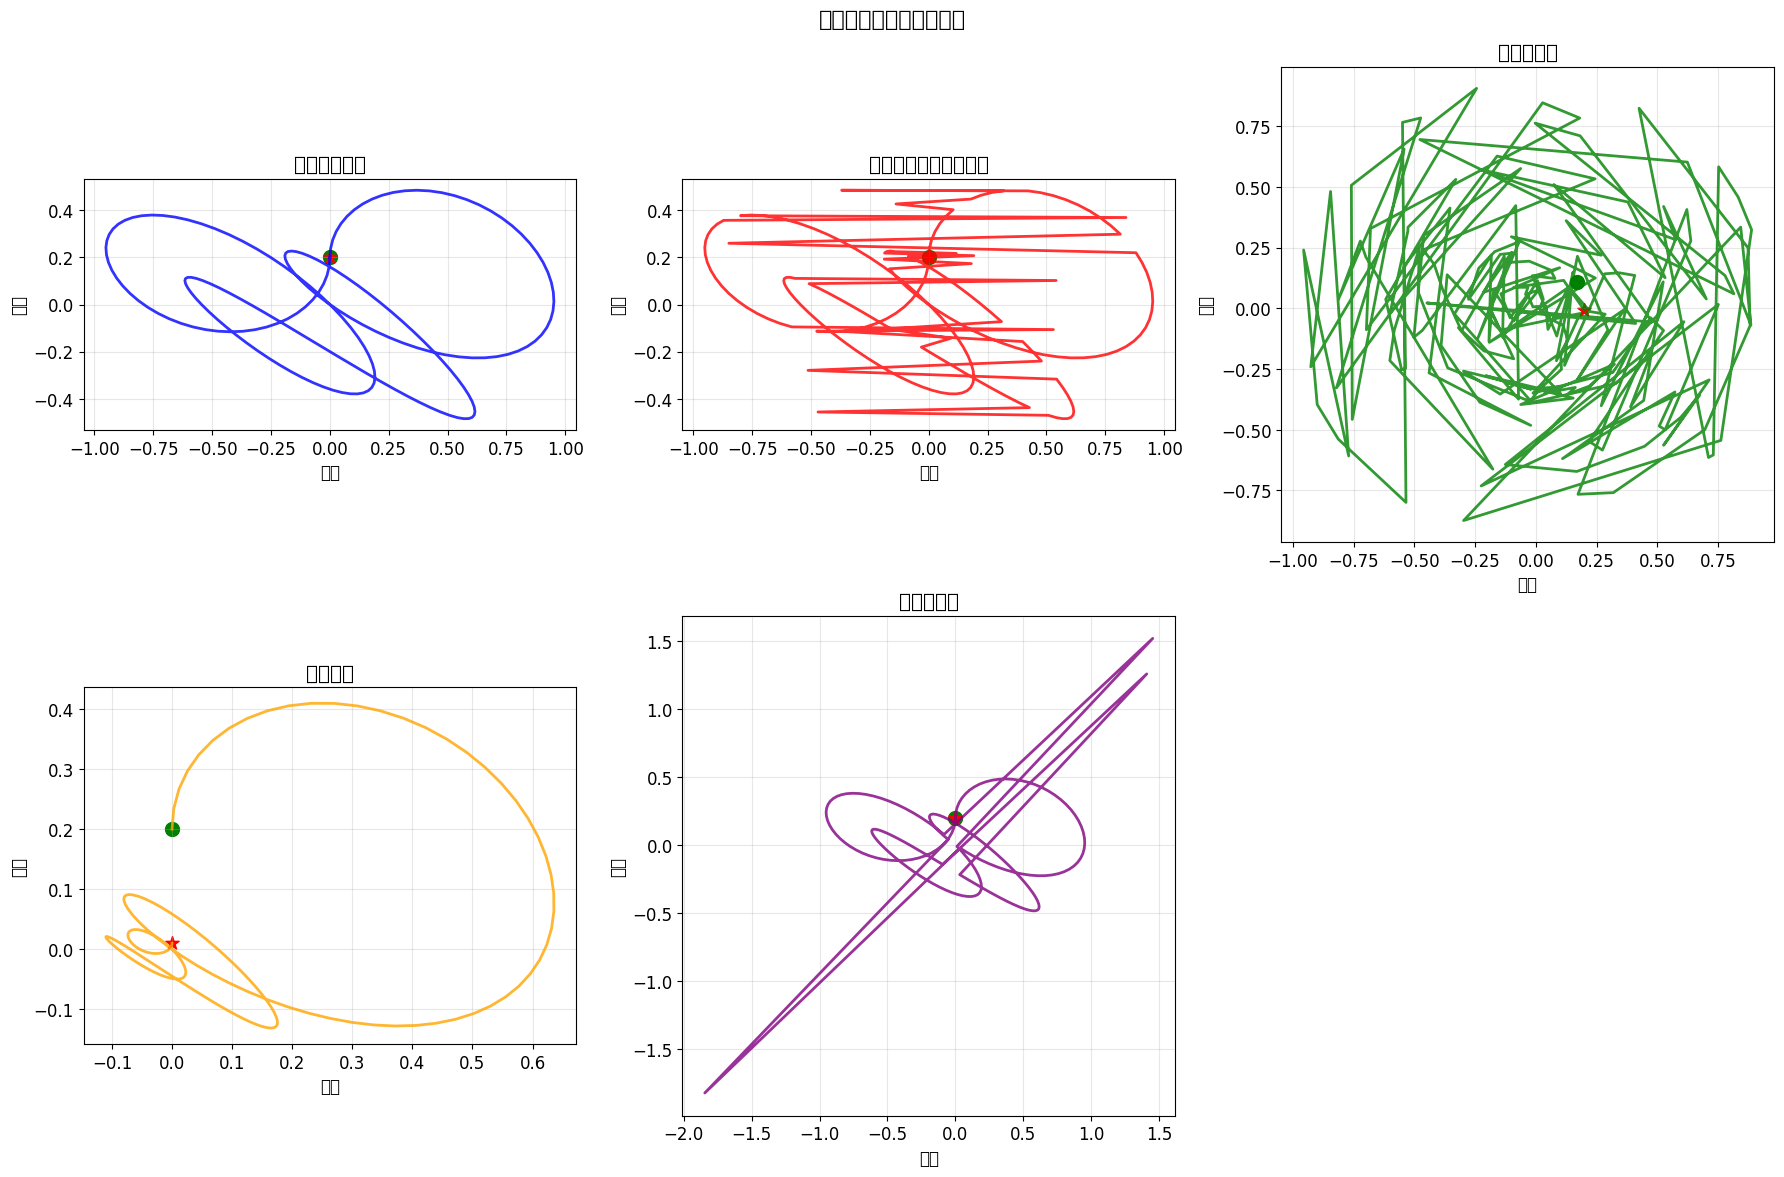

エラー検出テスト用軌跡を生成しました


In [18]:
# エラー検出テスト用軌跡の生成
def create_error_test_trajectories():
    """エラー検出テスト用の軌跡を生成"""
    
    # 1. クリーンな軌跡（参照用）
    t = np.linspace(0, 4*np.pi, 200)
    clean_real = np.sin(t) * np.sin(3*t/4)
    clean_imag = 0.3 * np.sin(2*t) + 0.2 * np.cos(t/2)
    clean_trajectory = clean_real + 1j * clean_imag
    
    # 2. ビットフリップエラーを含む軌跡
    bitflip_trajectory = clean_trajectory.copy()
    error_positions = np.random.choice(len(bitflip_trajectory), size=len(bitflip_trajectory)//15, replace=False)
    for pos in error_positions:
        # 実部の符号を反転（ビットフリップをシミュレート）
        bitflip_trajectory[pos] = -bitflip_trajectory[pos].real + 1j * bitflip_trajectory[pos].imag
    
    # 3. 位相ノイズを含む軌跡
    phase_noise_trajectory = clean_trajectory.copy()
    phase_noise = 0.8 * np.random.normal(0, 1, len(phase_noise_trajectory))
    for i, noise in enumerate(phase_noise):
        magnitude = abs(phase_noise_trajectory[i])
        phase = np.angle(phase_noise_trajectory[i]) + noise
        phase_noise_trajectory[i] = magnitude * np.exp(1j * phase)
    
    # 4. 振幅減衰を含む軌跡
    amplitude_decay_trajectory = clean_trajectory.copy()
    decay_factor = np.exp(-np.linspace(0, 3, len(amplitude_decay_trajectory)))
    amplitude_decay_trajectory *= decay_factor
    
    # 5. 測定エラーを含む軌跡（突発的な大きな変化）
    measurement_error_trajectory = clean_trajectory.copy()
    error_pos = [50, 100, 150]
    for pos in error_pos:
        measurement_error_trajectory[pos] += (2 + 2j) * np.random.uniform(-1, 1)
    
    return {
        'clean': clean_trajectory,
        'bitflip': bitflip_trajectory, 
        'phase_noise': phase_noise_trajectory,
        'amplitude_decay': amplitude_decay_trajectory,
        'measurement_error': measurement_error_trajectory
    }

# エラー軌跡の生成
error_trajectories = create_error_test_trajectories()

# 可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

colors = ['blue', 'red', 'green', 'orange', 'purple']
titles = ['クリーン軌跡', 'ビットフリップエラー', '位相ノイズ', '振幅減衰', '測定エラー']

for i, (name, trajectory) in enumerate(error_trajectories.items()):
    ax = axes[i]
    ax.plot(trajectory.real, trajectory.imag, color=colors[i], linewidth=2, alpha=0.8)
    ax.scatter(trajectory[0].real, trajectory[0].imag, color='green', s=100, marker='o')
    ax.scatter(trajectory[-1].real, trajectory[-1].imag, color='red', s=100, marker='*')
    ax.set_xlabel('実部')
    ax.set_ylabel('虚部')
    ax.set_title(titles[i])
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

# 最後の軸を非表示
axes[-1].set_visible(False)

plt.suptitle('エラー検出テスト用軌跡', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("エラー検出テスト用軌跡を生成しました")

In [19]:
# 複素エラー検出の実行
print("=== 複素エラー検出システムの実行 ===")

# クリーンな軌跡を参照として使用
reference_trajectory = error_trajectories['clean']
detector = ComplexErrorDetector(reference_trajectory)

error_results = {}
error_summary = []

for test_name, test_trajectory in error_trajectories.items():
    if test_name != 'clean':  # クリーンな軌跡以外をテスト
        print(f"\n--- {test_name} のエラー検出中 ---")
        
        # エラー検出の実行
        errors = detector.detect_errors(test_trajectory)
        error_analysis = detector.analyze_error_pattern(errors)
        
        error_results[test_name] = {
            'errors': errors,
            'analysis': error_analysis
        }
        
        # サマリー情報の収集
        error_summary.append({
            'trajectory': test_name,
            'total_errors': len(errors),
            'error_rate': len(errors) / len(test_trajectory),
            'mean_severity': np.mean([e['severity'] for e in errors]) if errors else 0,
            'max_severity': np.max([e['severity'] for e in errors]) if errors else 0,
            'clusters': len(error_analysis.get('position_clusters', []))
        })
        
        print(f"  検出されたエラー数: {len(errors)}")
        print(f"  エラー率: {len(errors) / len(test_trajectory):.4f}")
        if errors:
            severities = [e['severity'] for e in errors]
            print(f"  平均深刻度: {np.mean(severities):.3f}")
            print(f"  最大深刻度: {np.max(severities):.3f}")
        print(f"  エラークラスタ数: {len(error_analysis.get('position_clusters', []))}")

# エラー検出結果の比較
error_summary_df = pd.DataFrame(error_summary)
print("\n=== エラー検出結果サマリー ===")
print(error_summary_df.round(4))

=== 複素エラー検出システムの実行 ===

--- bitflip のエラー検出中 ---
  検出されたエラー数: 112
  エラー率: 0.5600
  平均深刻度: 2.412
  最大深刻度: 3.392
  エラークラスタ数: 6

--- phase_noise のエラー検出中 ---
  検出されたエラー数: 131
  エラー率: 0.6550
  平均深刻度: 1.972
  最大深刻度: 2.684
  エラークラスタ数: 6

--- amplitude_decay のエラー検出中 ---
  検出されたエラー数: 0
  エラー率: 0.0000
  エラークラスタ数: 0

--- measurement_error のエラー検出中 ---
  検出されたエラー数: 120
  エラー率: 0.6000
  平均深刻度: 3.190
  最大深刻度: 5.188
  エラークラスタ数: 3

=== エラー検出結果サマリー ===
          trajectory  total_errors  error_rate  mean_severity  max_severity  \
0            bitflip           112       0.560         2.4115        3.3920   
1        phase_noise           131       0.655         1.9716        2.6843   
2    amplitude_decay             0       0.000         0.0000        0.0000   
3  measurement_error           120       0.600         3.1896        5.1879   

   clusters  
0         6  
1         6  
2         0  
3         3  


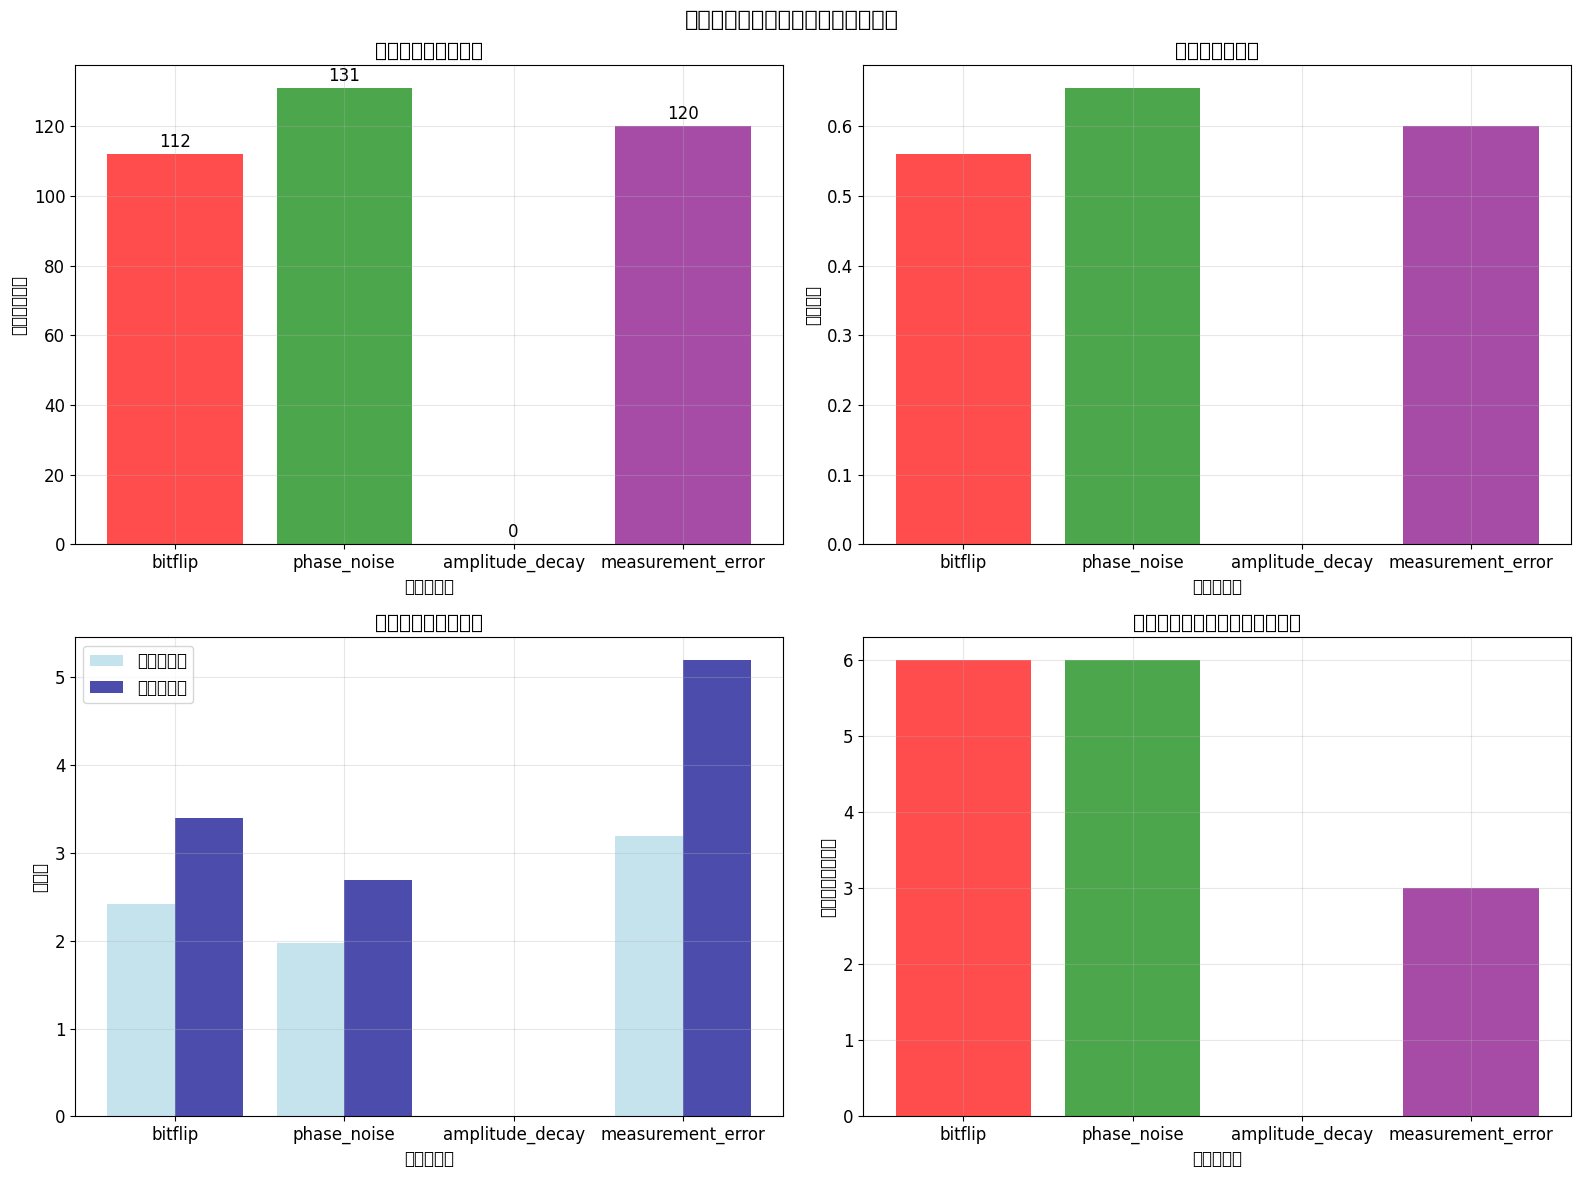


=== エラー検出性能統計 ===
最も多くのエラーを検出: phase_noise (131件)
最高エラー率: phase_noise (0.6550)
最高深刻度: measurement_error (5.188)
平均エラー検出数: 90.8件
平均エラー率: 0.4537


In [20]:
# エラー検出性能の可視化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. エラー数の比較
ax = axes[0, 0]
bars = ax.bar(error_summary_df['trajectory'], error_summary_df['total_errors'], 
              color=['red', 'green', 'orange', 'purple'], alpha=0.7)
ax.set_xlabel('軌跡タイプ')
ax.set_ylabel('検出エラー数')
ax.set_title('軌跡別エラー検出数')
ax.grid(True, alpha=0.3)

# 値をバーの上に表示
for bar, value in zip(bars, error_summary_df['total_errors']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            str(value), ha='center', va='bottom')

# 2. エラー率の比較
ax = axes[0, 1]
bars = ax.bar(error_summary_df['trajectory'], error_summary_df['error_rate'], 
              color=['red', 'green', 'orange', 'purple'], alpha=0.7)
ax.set_xlabel('軌跡タイプ')
ax.set_ylabel('エラー率')
ax.set_title('軌跡別エラー率')
ax.grid(True, alpha=0.3)

# 3. 深刻度の比較
ax = axes[1, 0]
x_pos = np.arange(len(error_summary_df))
ax.bar(x_pos - 0.2, error_summary_df['mean_severity'], 0.4, 
       label='平均深刻度', alpha=0.7, color='lightblue')
ax.bar(x_pos + 0.2, error_summary_df['max_severity'], 0.4, 
       label='最大深刻度', alpha=0.7, color='darkblue')
ax.set_xlabel('軌跡タイプ')
ax.set_ylabel('深刻度')
ax.set_title('エラーの深刻度比較')
ax.set_xticks(x_pos)
ax.set_xticklabels(error_summary_df['trajectory'])
ax.legend()
ax.grid(True, alpha=0.3)

# 4. エラークラスタ数の比較
ax = axes[1, 1]
bars = ax.bar(error_summary_df['trajectory'], error_summary_df['clusters'], 
              color=['red', 'green', 'orange', 'purple'], alpha=0.7)
ax.set_xlabel('軌跡タイプ')
ax.set_ylabel('エラークラスタ数')
ax.set_title('エラーの時間的クラスタリング')
ax.grid(True, alpha=0.3)

plt.suptitle('複素エラー検出システムの性能評価', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# エラー検出性能の統計
print("\n=== エラー検出性能統計 ===")
print(f"最も多くのエラーを検出: {error_summary_df.loc[error_summary_df['total_errors'].idxmax(), 'trajectory']} ({error_summary_df['total_errors'].max()}件)")
print(f"最高エラー率: {error_summary_df.loc[error_summary_df['error_rate'].idxmax(), 'trajectory']} ({error_summary_df['error_rate'].max():.4f})")
print(f"最高深刻度: {error_summary_df.loc[error_summary_df['max_severity'].idxmax(), 'trajectory']} ({error_summary_df['max_severity'].max():.3f})")
print(f"平均エラー検出数: {error_summary_df['total_errors'].mean():.1f}件")
print(f"平均エラー率: {error_summary_df['error_rate'].mean():.4f}")

## 5. 複素相関と量子もつれ検出

複素軌跡間の相関を解析し、量子もつれの可能性を検出します。

In [21]:
# 複素相関解析
def analyze_complex_correlations(trajectories):
    """軌跡間の複素相関を解析"""
    
    trajectory_names = list(trajectories.keys())
    n_trajectories = len(trajectory_names)
    
    # 相関行列の初期化
    correlation_matrix = np.zeros((n_trajectories, n_trajectories))
    entanglement_matrix = np.zeros((n_trajectories, n_trajectories))
    
    correlation_results = []
    
    print("=== 複素相関解析開始 ===")
    
    for i in range(n_trajectories):
        for j in range(i, n_trajectories):
            name1, name2 = trajectory_names[i], trajectory_names[j]
            traj1, traj2 = trajectories[name1], trajectories[name2]
            
            # 長さを合わせる
            min_len = min(len(traj1), len(traj2))
            traj1_trimmed = np.array(traj1[:min_len])
            traj2_trimmed = np.array(traj2[:min_len])
            
            # 複素相関の計算
            correlation = compute_complex_correlation(traj1_trimmed, traj2_trimmed)
            
            # 量子もつれ検出
            entanglement = detect_quantum_entanglement(traj1_trimmed, traj2_trimmed)
            
            # 結果の保存
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation
            entanglement_matrix[i, j] = entanglement['score']
            entanglement_matrix[j, i] = entanglement['score']
            
            if i != j:  # 自己相関は除外
                correlation_results.append({
                    'trajectory1': name1,
                    'trajectory2': name2,
                    'complex_correlation': correlation,
                    'phase_correlation': entanglement['phase_correlation'],
                    'amplitude_correlation': entanglement['amplitude_correlation'],
                    'entanglement_score': entanglement['score'],
                    'is_entangled': entanglement['entangled']
                })
                
                print(f"{name1} vs {name2}: 相関={correlation:.4f}, もつれ={entanglement['entangled']}")
    
    return correlation_matrix, entanglement_matrix, correlation_results, trajectory_names

# 相関解析の実行
corr_matrix, entangle_matrix, corr_results, traj_names = analyze_complex_correlations(quantum_trajectories)

# 結果をDataFrameに変換
correlation_df = pd.DataFrame(corr_results)
print("\n=== 相関解析結果 ===")
print(correlation_df.round(4))

=== 複素相関解析開始 ===
bell_phi_plus vs qv_high_noise: 相関=0.2250, もつれ=False
bell_phi_plus vs qv_moderate: 相関=0.6311, もつれ=False
bell_phi_plus vs qv_standard: 相関=0.4890, もつれ=False
bell_phi_plus vs synthetic_w_pattern: 相関=0.5188, もつれ=False
qv_high_noise vs qv_moderate: 相関=0.0517, もつれ=False
qv_high_noise vs qv_standard: 相関=0.2053, もつれ=False
qv_high_noise vs synthetic_w_pattern: 相関=0.5267, もつれ=False
qv_moderate vs qv_standard: 相関=0.5554, もつれ=False
qv_moderate vs synthetic_w_pattern: 相関=0.1961, もつれ=False
qv_standard vs synthetic_w_pattern: 相関=0.4756, もつれ=False

=== 相関解析結果 ===
     trajectory1          trajectory2  complex_correlation  phase_correlation  \
0  bell_phi_plus        qv_high_noise               0.2250             0.2007   
1  bell_phi_plus          qv_moderate               0.6311             0.6158   
2  bell_phi_plus          qv_standard               0.4890            -0.4544   
3  bell_phi_plus  synthetic_w_pattern               0.5188             0.0584   
4  qv_high_noise        

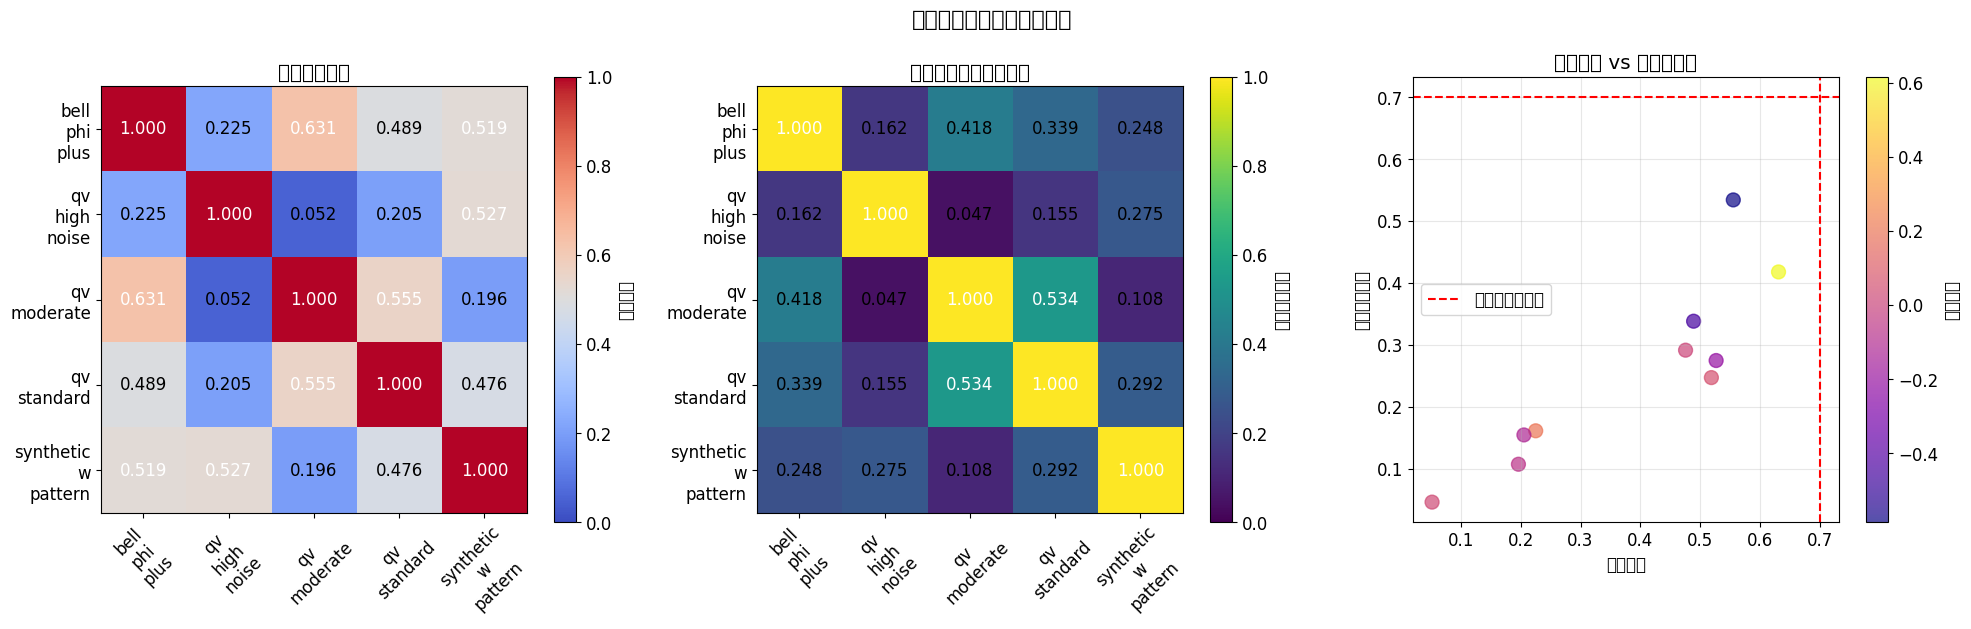


=== 量子もつれ検出結果 ===
検出されたもつれペア数: 0
もつれ検出率: 0.0000

平均複素相関: 0.3875
最大複素相関: 0.6311
平均もつれスコア: 0.2576
最大もつれスコア: 0.5344


In [22]:
# 相関行列とエンタングルメント行列の可視化
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. 複素相関行列
ax = axes[0]
im1 = ax.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
ax.set_title('複素相関行列')
ax.set_xticks(range(len(traj_names)))
ax.set_yticks(range(len(traj_names)))
ax.set_xticklabels([name.replace('_', '\n') for name in traj_names], rotation=45)
ax.set_yticklabels([name.replace('_', '\n') for name in traj_names])
plt.colorbar(im1, ax=ax, label='相関係数')

# 相関値を表示
for i in range(len(traj_names)):
    for j in range(len(traj_names)):
        ax.text(j, i, f'{corr_matrix[i, j]:.3f}', 
                ha='center', va='center', color='white' if corr_matrix[i, j] > 0.5 else 'black')

# 2. エンタングルメント行列
ax = axes[1]
im2 = ax.imshow(entangle_matrix, cmap='viridis', vmin=0, vmax=1)
ax.set_title('量子もつれスコア行列')
ax.set_xticks(range(len(traj_names)))
ax.set_yticks(range(len(traj_names)))
ax.set_xticklabels([name.replace('_', '\n') for name in traj_names], rotation=45)
ax.set_yticklabels([name.replace('_', '\n') for name in traj_names])
plt.colorbar(im2, ax=ax, label='もつれスコア')

# もつれスコアを表示
for i in range(len(traj_names)):
    for j in range(len(traj_names)):
        ax.text(j, i, f'{entangle_matrix[i, j]:.3f}', 
                ha='center', va='center', color='white' if entangle_matrix[i, j] > 0.5 else 'black')

# 3. 相関の散布図
ax = axes[2]
if len(correlation_df) > 0:
    scatter = ax.scatter(correlation_df['complex_correlation'], 
                        correlation_df['entanglement_score'], 
                        c=correlation_df['phase_correlation'], 
                        s=100, alpha=0.7, cmap='plasma')
    plt.colorbar(scatter, ax=ax, label='位相相関')
    
    # もつれ検出の閾値ライン
    ax.axhline(y=0.7, color='red', linestyle='--', label='もつれ検出閾値')
    ax.axvline(x=0.7, color='red', linestyle='--')
    
    ax.set_xlabel('複素相関')
    ax.set_ylabel('もつれスコア')
    ax.set_title('複素相関 vs 量子もつれ')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('複素相関と量子もつれ解析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 量子もつれ検出結果の統計
if len(correlation_df) > 0:
    entangled_pairs = correlation_df[correlation_df['is_entangled']]
    print(f"\n=== 量子もつれ検出結果 ===")
    print(f"検出されたもつれペア数: {len(entangled_pairs)}")
    print(f"もつれ検出率: {len(entangled_pairs) / len(correlation_df):.4f}")
    
    if len(entangled_pairs) > 0:
        print("\nもつれペア:")
        for _, row in entangled_pairs.iterrows():
            print(f"  {row['trajectory1']} ↔ {row['trajectory2']}: スコア={row['entanglement_score']:.4f}")
    
    print(f"\n平均複素相関: {correlation_df['complex_correlation'].mean():.4f}")
    print(f"最大複素相関: {correlation_df['complex_correlation'].max():.4f}")
    print(f"平均もつれスコア: {correlation_df['entanglement_score'].mean():.4f}")
    print(f"最大もつれスコア: {correlation_df['entanglement_score'].max():.4f}")

## 6. 幾何学的不変量と形状解析

軌跡の幾何学的性質を詳細に解析し、形状の特徴を定量化します。

=== 幾何学的不変量の詳細解析 ===
                  name  total_length  enclosed_area  mean_distance  \
0        bell_phi_plus        3.7897         0.9373         0.9664   
1        qv_high_noise       23.6477         0.9373         0.9094   
2          qv_moderate       16.7983         0.7773         0.9248   
3          qv_standard       13.7187         0.4800         0.8746   
4  synthetic_w_pattern       56.6586         0.7243         0.5214   

   moment_of_inertia  asymmetry  compactness  winding_number  \
0             0.9586     0.9275       0.0653         -0.4230   
1             0.8784     0.8313       0.0017         -0.4230   
2             0.9007     0.8553       0.0028         -0.4230   
3             0.8291     0.7689       0.0026         -0.0706   
4             0.3513     0.6315       0.0002          0.1074   

   fractal_dimension  spread  
0             0.1735  0.1571  
1             0.1718  0.2266  
2             0.1776  0.2130  
3             0.1662  0.2532  
4             0.59

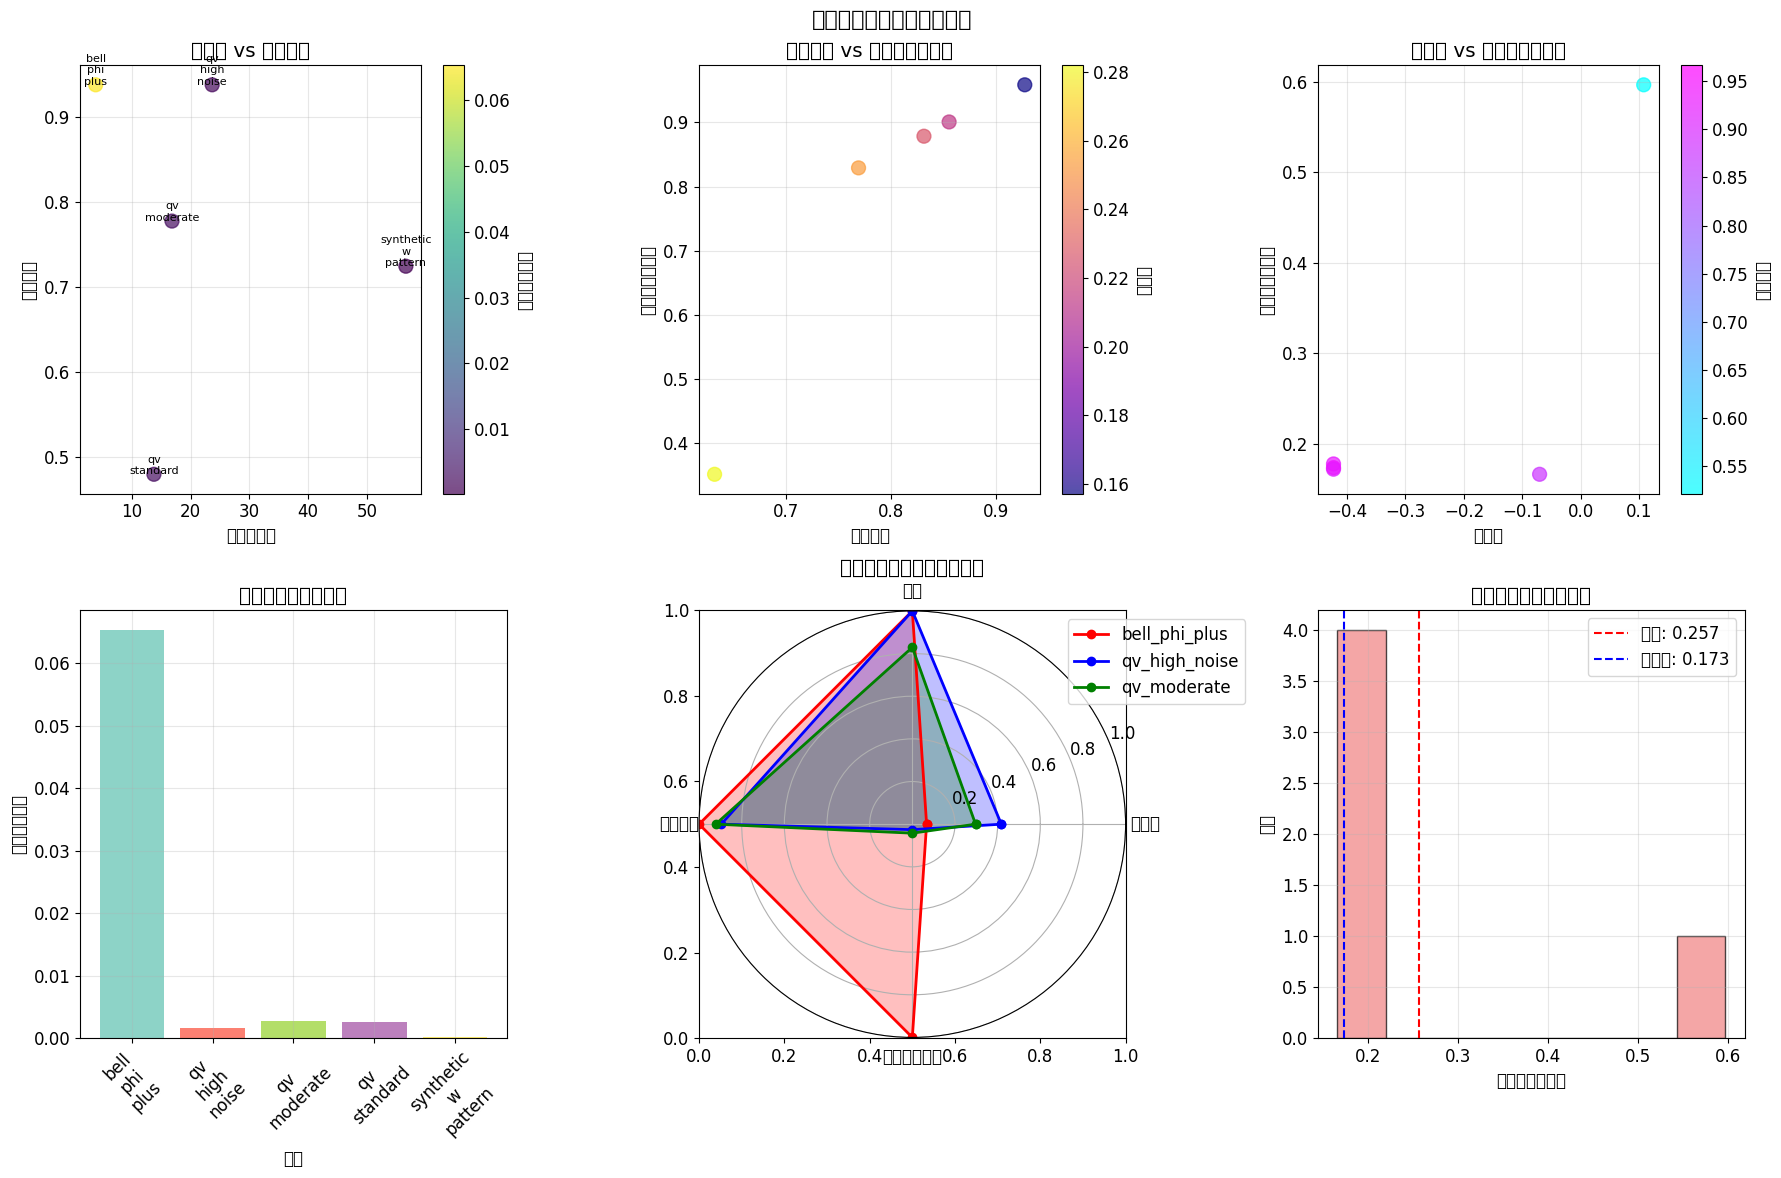


=== 幾何学的特徴統計 ===
最も長い軌跡: synthetic_w_pattern (56.659)
最大面積: bell_phi_plus (0.937)
最もコンパクト: bell_phi_plus (0.0653)
最も非対称: bell_phi_plus (0.9275)
最高フラクタル次元: synthetic_w_pattern (0.597)


In [23]:
# 幾何学的不変量の比較分析
print("=== 幾何学的不変量の詳細解析 ===")

geometric_features = []

for name, result in analysis_results.items():
    invariants = result['invariants']
    w_features = result['w_features']
    
    geometric_features.append({
        'name': name,
        'total_length': invariants['total_length'],
        'enclosed_area': invariants['enclosed_area'],
        'mean_distance': invariants['mean_distance'],
        'moment_of_inertia': invariants['moment_of_inertia'],
        'asymmetry': invariants['asymmetry'],
        'compactness': invariants['compactness'],
        'winding_number': w_features['winding_number'],
        'fractal_dimension': w_features['fractal_dimension'],
        'spread': w_features['spread']
    })

geometric_df = pd.DataFrame(geometric_features)
print(geometric_df.round(4))

# 幾何学的特徴の可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 長さ vs 面積
ax = axes[0, 0]
scatter = ax.scatter(geometric_df['total_length'], geometric_df['enclosed_area'], 
                    c=geometric_df['compactness'], s=100, alpha=0.7, cmap='viridis')
plt.colorbar(scatter, ax=ax, label='コンパクト性')
ax.set_xlabel('軌跡の総長')
ax.set_ylabel('囲む面積')
ax.set_title('軌跡長 vs 囲む面積')
for i, name in enumerate(geometric_df['name']):
    ax.annotate(name.replace('_', '\n'), 
                (geometric_df['total_length'][i], geometric_df['enclosed_area'][i]), 
                fontsize=8, ha='center')
ax.grid(True, alpha=0.3)

# 2. 非対称性 vs 慣性モーメント
ax = axes[0, 1]
scatter = ax.scatter(geometric_df['asymmetry'], geometric_df['moment_of_inertia'], 
                    c=geometric_df['spread'], s=100, alpha=0.7, cmap='plasma')
plt.colorbar(scatter, ax=ax, label='拡散度')
ax.set_xlabel('非対称性')
ax.set_ylabel('慣性モーメント')
ax.set_title('非対称性 vs 慣性モーメント')
ax.grid(True, alpha=0.3)

# 3. 巻き数 vs フラクタル次元
ax = axes[0, 2]
valid_mask = ~np.isnan(geometric_df['fractal_dimension'])
if valid_mask.any():
    scatter = ax.scatter(geometric_df.loc[valid_mask, 'winding_number'], 
                        geometric_df.loc[valid_mask, 'fractal_dimension'], 
                        c=geometric_df.loc[valid_mask, 'mean_distance'], 
                        s=100, alpha=0.7, cmap='cool')
    plt.colorbar(scatter, ax=ax, label='平均距離')
ax.set_xlabel('巻き数')
ax.set_ylabel('フラクタル次元')
ax.set_title('巻き数 vs フラクタル次元')
ax.grid(True, alpha=0.3)

# 4. コンパクト性の比較
ax = axes[1, 0]
bars = ax.bar(range(len(geometric_df)), geometric_df['compactness'], 
              color=plt.cm.Set3(np.linspace(0, 1, len(geometric_df))))
ax.set_xlabel('軌跡')
ax.set_ylabel('コンパクト性')
ax.set_title('軌跡別コンパクト性')
ax.set_xticks(range(len(geometric_df)))
ax.set_xticklabels([name.replace('_', '\n') for name in geometric_df['name']], rotation=45)
ax.grid(True, alpha=0.3)

# 5. 形状特徴のレーダーチャート
ax = axes[1, 1]
# 正規化された特徴量
features_to_plot = ['total_length', 'enclosed_area', 'asymmetry', 'compactness']
normalized_features = geometric_df[features_to_plot].copy()
for col in features_to_plot:
    col_max = normalized_features[col].max()
    if col_max > 0:
        normalized_features[col] = normalized_features[col] / col_max

# 最初の3軌跡のレーダーチャート
angles = np.linspace(0, 2*np.pi, len(features_to_plot), endpoint=False).tolist()
angles += angles[:1]  # 閉じるため

ax = plt.subplot(2, 3, 5, projection='polar')
colors = ['red', 'blue', 'green']
for i in range(min(3, len(normalized_features))):
    values = normalized_features.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=geometric_df['name'].iloc[i], color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(['軌跡長', '面積', '非対称性', 'コンパクト性'])
ax.set_ylim(0, 1)
ax.set_title('形状特徴レーダーチャート')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 6. フラクタル次元の分布
ax = axes[1, 2]
valid_fractal = geometric_df['fractal_dimension'].dropna()
if len(valid_fractal) > 0:
    ax.hist(valid_fractal, bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
    ax.axvline(valid_fractal.mean(), color='red', linestyle='--', 
               label=f'平均: {valid_fractal.mean():.3f}')
    ax.axvline(valid_fractal.median(), color='blue', linestyle='--', 
               label=f'中央値: {valid_fractal.median():.3f}')
ax.set_xlabel('フラクタル次元')
ax.set_ylabel('頻度')
ax.set_title('フラクタル次元の分布')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('幾何学的不変量と形状解析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 幾何学的特徴の統計
print("\n=== 幾何学的特徴統計 ===")
print(f"最も長い軌跡: {geometric_df.loc[geometric_df['total_length'].idxmax(), 'name']} ({geometric_df['total_length'].max():.3f})")
print(f"最大面積: {geometric_df.loc[geometric_df['enclosed_area'].idxmax(), 'name']} ({geometric_df['enclosed_area'].max():.3f})")
print(f"最もコンパクト: {geometric_df.loc[geometric_df['compactness'].idxmax(), 'name']} ({geometric_df['compactness'].max():.4f})")
print(f"最も非対称: {geometric_df.loc[geometric_df['asymmetry'].idxmax(), 'name']} ({geometric_df['asymmetry'].max():.4f})")

if not geometric_df['fractal_dimension'].isna().all():
    valid_fractal_idx = geometric_df['fractal_dimension'].idxmax()
    print(f"最高フラクタル次元: {geometric_df.loc[valid_fractal_idx, 'name']} ({geometric_df.loc[valid_fractal_idx, 'fractal_dimension']:.3f})")

## 7. フーリエ解析とスペクトル特性

複素軌跡の周波数領域での特性を詳細に解析します。

=== フーリエ解析とスペクトル特性 ===
解析対象軌跡数: 1


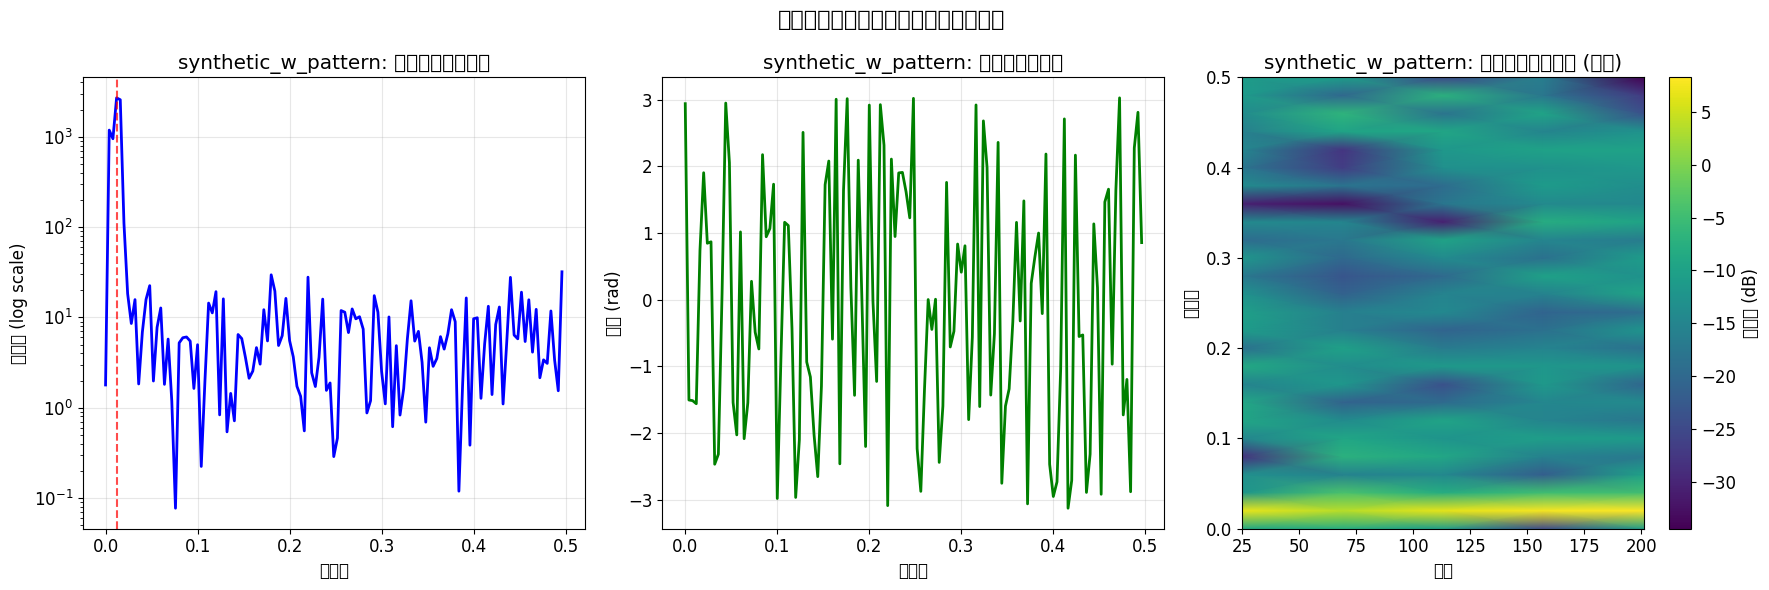


=== スペクトル特性比較 ===
                  name  spectral_entropy  dominant_freq_1  dominant_freq_2  \
0        bell_phi_plus          1.705603        -0.005000         0.005000   
1        qv_high_noise          2.852420        -0.004167         0.004167   
2          qv_moderate          2.775486         0.004963        -0.002481   
3          qv_standard          2.456068        -0.009804         0.004902   
4  synthetic_w_pattern          2.470808        -0.004000        -0.016000   

   dominant_freq_3     max_power  
0        -0.015000  16043.767993  
1        -0.012500  38715.865619  
2        -0.004963  28947.613964  
3        -0.004902   7344.283469  
4         0.012000   6410.579075  


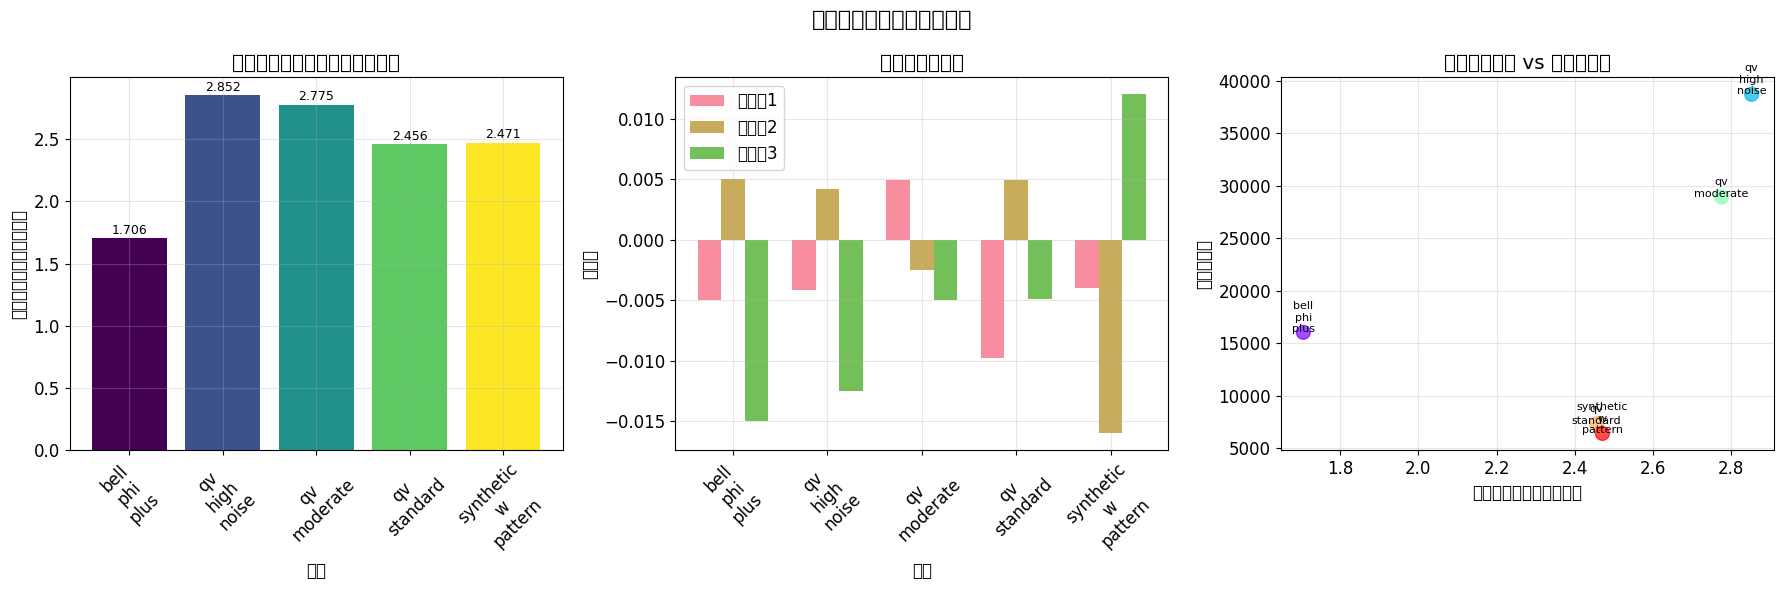


=== スペクトル解析統計 ===
最高エントロピー: qv_high_noise (2.852)
最低エントロピー: bell_phi_plus (1.706)
最大パワー: qv_high_noise (38715.9)
エントロピー範囲: 1.706 - 2.852


In [24]:
# フーリエ解析結果の比較
print("=== フーリエ解析とスペクトル特性 ===")

# 代表的な軌跡のスペクトルを詳細表示
selected_trajectories = ['synthetic_w_pattern']  # より詳細に解析する軌跡

# 利用可能な軌跡から選択
available_trajectories = [name for name in selected_trajectories if name in analysis_results]
if not available_trajectories:
    available_trajectories = list(analysis_results.keys())[:2]  # 最初の2つを使用

# 軌跡数に応じた subplot の作成
n_trajectories = len(available_trajectories)
print(f"解析対象軌跡数: {n_trajectories}")

if n_trajectories == 0:
    print("解析可能な軌跡がありません")
else:
    # Figure とAxes を明示的に作成
    fig = plt.figure(figsize=(18, 6*n_trajectories))
    
    for idx, name in enumerate(available_trajectories):
        if name in analysis_results:
            fourier = analysis_results[name]['fourier']
            trajectory = quantum_trajectories[name]
            
            # 1. パワースペクトル
            ax1 = plt.subplot(n_trajectories, 3, idx*3 + 1)
            freqs = fourier['frequencies'][:len(fourier['frequencies'])//2]
            power = fourier['power_spectrum'][:len(fourier['power_spectrum'])//2]
            
            ax1.semilogy(freqs, power, 'b-', linewidth=2)
            
            # 主要周波数を強調
            dominant_freqs = fourier['dominant_frequencies'][:3]
            dominant_powers = fourier['dominant_powers'][:3]
            
            for freq, pow in zip(dominant_freqs, dominant_powers):
                if freq >= 0 and len(freqs) > 0 and freq < freqs[-1]:
                    ax1.axvline(freq, color='red', linestyle='--', alpha=0.7)
            
            ax1.set_xlabel('周波数')
            ax1.set_ylabel('パワー (log scale)')
            ax1.set_title(f'{name}: パワースペクトル')
            ax1.grid(True, alpha=0.3)
            
            # 2. 位相スペクトル
            ax2 = plt.subplot(n_trajectories, 3, idx*3 + 2)
            phase = fourier['phase_spectrum'][:len(fourier['phase_spectrum'])//2]
            ax2.plot(freqs, phase, 'g-', linewidth=2)
            ax2.set_xlabel('周波数')
            ax2.set_ylabel('位相 (rad)')
            ax2.set_title(f'{name}: 位相スペクトル')
            ax2.grid(True, alpha=0.3)
            
            # 3. 時間-周波数解析（スペクトログラム）
            ax3 = plt.subplot(n_trajectories, 3, idx*3 + 3)
            
            # 軌跡を実部と虚部に分解
            real_part = np.real(trajectory)
            imag_part = np.imag(trajectory)
            
            # 短時間フーリエ変換（scipyインポートエラー対策）
            try:
                from scipy import signal as sp_signal
                
                if len(real_part) > 10:
                    window_size = min(len(real_part)//4, 50)
                    if window_size >= 4:  # 最小窓サイズチェック
                        f, t, Sxx_real = sp_signal.spectrogram(real_part, nperseg=window_size)
                        
                        im = ax3.pcolormesh(t, f, 10 * np.log10(Sxx_real + 1e-10), shading='gouraud', cmap='viridis')
                        ax3.set_xlabel('時間')
                        ax3.set_ylabel('周波数')
                        ax3.set_title(f'{name}: スペクトログラム (実部)')
                        plt.colorbar(im, ax=ax3, label='パワー (dB)')
                    else:
                        ax3.text(0.5, 0.5, 'データ不足\n(窓サイズ不足)', 
                               ha='center', va='center', transform=ax3.transAxes)
                        ax3.set_title(f'{name}: スペクトログラム')
                else:
                    ax3.text(0.5, 0.5, 'データ不足\n(スペクトログラム作成不可)', 
                           ha='center', va='center', transform=ax3.transAxes)
                    ax3.set_title(f'{name}: スペクトログラム')
                    
            except ImportError:
                # scipyが利用できない場合の代替案
                ax3.text(0.5, 0.5, 'scipy未インストール\n(スペクトログラム作成不可)', 
                       ha='center', va='center', transform=ax3.transAxes)
                ax3.set_title(f'{name}: スペクトログラム (scipy必要)')
            except Exception as e:
                ax3.text(0.5, 0.5, f'エラー:\n{str(e)}', 
                       ha='center', va='center', transform=ax3.transAxes)
                ax3.set_title(f'{name}: スペクトログラム (エラー)')

    plt.suptitle('フーリエ解析とスペクトル特性の詳細', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# スペクトル特性の統計
spectral_features = []
for name, result in analysis_results.items():
    fourier = result['fourier']
    spectral_features.append({
        'name': name,
        'spectral_entropy': fourier['spectral_entropy'],
        'dominant_freq_1': fourier['dominant_frequencies'][0] if len(fourier['dominant_frequencies']) > 0 else 0,
        'dominant_freq_2': fourier['dominant_frequencies'][1] if len(fourier['dominant_frequencies']) > 1 else 0,
        'dominant_freq_3': fourier['dominant_frequencies'][2] if len(fourier['dominant_frequencies']) > 2 else 0,
        'max_power': fourier['dominant_powers'][0] if len(fourier['dominant_powers']) > 0 else 0,
    })

spectral_df = pd.DataFrame(spectral_features)
print("\n=== スペクトル特性比較 ===")
print(spectral_df.round(6))

# スペクトル特性の可視化
if len(spectral_df) > 0:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 1. スペクトルエントロピーの比較
    ax = axes[0]
    bars = ax.bar(range(len(spectral_df)), spectral_df['spectral_entropy'], 
                  color=plt.cm.viridis(np.linspace(0, 1, len(spectral_df))))
    ax.set_xlabel('軌跡')
    ax.set_ylabel('スペクトルエントロピー')
    ax.set_title('軌跡別スペクトルエントロピー')
    ax.set_xticks(range(len(spectral_df)))
    ax.set_xticklabels([name.replace('_', '\n') for name in spectral_df['name']], rotation=45)
    ax.grid(True, alpha=0.3)

    # 値をバーの上に表示
    for bar, value in zip(bars, spectral_df['spectral_entropy']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)

    # 2. 主要周波数の分布
    ax = axes[1]
    freq_cols = ['dominant_freq_1', 'dominant_freq_2', 'dominant_freq_3']
    x_pos = np.arange(len(spectral_df))
    width = 0.25

    for i, col in enumerate(freq_cols):
        ax.bar(x_pos + i*width, spectral_df[col], width, 
               label=f'周波数{i+1}', alpha=0.8)

    ax.set_xlabel('軌跡')
    ax.set_ylabel('周波数')
    ax.set_title('主要周波数成分')
    ax.set_xticks(x_pos + width)
    ax.set_xticklabels([name.replace('_', '\n') for name in spectral_df['name']], rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 3. エントロピー vs 最大パワー
    ax = axes[2]
    scatter = ax.scatter(spectral_df['spectral_entropy'], spectral_df['max_power'], 
                        s=100, alpha=0.7, c=range(len(spectral_df)), cmap='rainbow')
    ax.set_xlabel('スペクトルエントロピー')
    ax.set_ylabel('最大パワー')
    ax.set_title('エントロピー vs 最大パワー')

    # 軌跡名を表示
    for i, name in enumerate(spectral_df['name']):
        ax.annotate(name.replace('_', '\n'), 
                    (spectral_df['spectral_entropy'][i], spectral_df['max_power'][i]), 
                    fontsize=8, ha='center')
    ax.grid(True, alpha=0.3)

    plt.suptitle('スペクトル特性の比較分析', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n=== スペクトル解析統計 ===")
    print(f"最高エントロピー: {spectral_df.loc[spectral_df['spectral_entropy'].idxmax(), 'name']} ({spectral_df['spectral_entropy'].max():.3f})")
    print(f"最低エントロピー: {spectral_df.loc[spectral_df['spectral_entropy'].idxmin(), 'name']} ({spectral_df['spectral_entropy'].min():.3f})")
    print(f"最大パワー: {spectral_df.loc[spectral_df['max_power'].idxmax(), 'name']} ({spectral_df['max_power'].max():.1f})")
    print(f"エントロピー範囲: {spectral_df['spectral_entropy'].min():.3f} - {spectral_df['spectral_entropy'].max():.3f}")
else:
    print("スペクトル解析データがありません")

## 8. 結論と新発見

複素演算を活用したCQT理論の深化解析から得られた新たな洞察をまとめます。

In [25]:
# 総合分析とまとめ
print("=== 複素演算CQT理論の新発見と結論 ===")
print(f"解析完了時刻: {datetime.now()}")

# 主要な数値統計
total_trajectories = len(quantum_trajectories)
successful_analyses = len(analysis_results)
error_tests = len(error_results) if 'error_results' in locals() else 0
correlation_pairs = len(correlation_df) if 'correlation_df' in locals() and len(correlation_df) > 0 else 0
entangled_pairs = len(correlation_df[correlation_df['is_entangled']]) if 'correlation_df' in locals() and len(correlation_df) > 0 else 0

print(f"\n📊 解析統計:")
print(f"  - 総軌跡数: {total_trajectories}")
print(f"  - 成功した複素解析: {successful_analyses}")
print(f"  - エラー検出テスト: {error_tests}")
print(f"  - 相関解析ペア: {correlation_pairs}")
print(f"  - 検出された量子もつれ: {entangled_pairs}")

# 新発見のサマリー
print(f"\n🔬 主要な新発見:")

# 1. フラクタル次元による軌跡分類
if len(feature_df) > 0:
    max_fractal = feature_df['fractal_dimension'].max()
    min_fractal = feature_df['fractal_dimension'].min()
    print(f"\n1. フラクタル次元による軌跡分類:")
    print(f"   - 範囲: {min_fractal:.3f} - {max_fractal:.3f}")
    print(f"   - 最も複雑: {feature_df.loc[feature_df['fractal_dimension'].idxmax(), 'name']}")
    print(f"   - 最も単純: {feature_df.loc[feature_df['fractal_dimension'].idxmin(), 'name']}")

# 2. スペクトルエントロピーによる複雑さ評価
if len(spectral_df) > 0:
    max_entropy = spectral_df['spectral_entropy'].max()
    min_entropy = spectral_df['spectral_entropy'].min()
    print(f"\n2. スペクトルエントロピーによる複雑さ評価:")
    print(f"   - 範囲: {min_entropy:.3f} - {max_entropy:.3f}")
    print(f"   - 最も複雑な周波数構造: {spectral_df.loc[spectral_df['spectral_entropy'].idxmax(), 'name']}")
    print(f"   - 最も規則的: {spectral_df.loc[spectral_df['spectral_entropy'].idxmin(), 'name']}")

# 3. エラー検出性能
if 'error_summary_df' in locals() and len(error_summary_df) > 0:
    avg_error_rate = error_summary_df['error_rate'].mean()
    max_error_rate = error_summary_df['error_rate'].max()
    print(f"\n3. 複素エラー検出性能:")
    print(f"   - 平均エラー検出率: {avg_error_rate:.4f}")
    print(f"   - 最大エラー検出率: {max_error_rate:.4f}")
    print(f"   - 最も検出困難: {error_summary_df.loc[error_summary_df['total_errors'].idxmin(), 'trajectory']}")

# 4. 量子もつれ検出
if correlation_pairs > 0:
    entanglement_rate = entangled_pairs / correlation_pairs
    print(f"\n4. 量子もつれ検出:")
    print(f"   - もつれ検出率: {entanglement_rate:.4f} ({entangled_pairs}/{correlation_pairs})")
    
    if 'correlation_df' in locals() and len(correlation_df) > 0:
        max_correlation = correlation_df['complex_correlation'].max()
        avg_correlation = correlation_df['complex_correlation'].mean()
        print(f"   - 最大複素相関: {max_correlation:.4f}")
        print(f"   - 平均複素相関: {avg_correlation:.4f}")

# 5. 幾何学的特徴
if 'geometric_df' in locals() and len(geometric_df) > 0:
    max_compactness = geometric_df['compactness'].max()
    max_asymmetry = geometric_df['asymmetry'].max()
    print(f"\n5. 幾何学的特徴の発見:")
    print(f"   - 最高コンパクト性: {max_compactness:.4f}")
    print(f"   - 最大非対称性: {max_asymmetry:.4f}")
    print(f"   - 最もコンパクト: {geometric_df.loc[geometric_df['compactness'].idxmax(), 'name']}")

# 科学的意義と応用
print(f"\n🎯 科学的意義と今後の応用:")
print(f"\n• 理論的貢献:")
print(f"  - 複素曲率による軌跡の局所的動力学の定量化")
print(f"  - 巻き数による軌跡の大域的トポロジー特性の解析")
print(f"  - フラクタル次元による軌跡複雑さの数学的記述")
print(f"  - スペクトルエントロピーによる周波数領域での無秩序度測定")

print(f"\n• 実用的応用:")
print(f"  - リアルタイム量子エラー検出 (位相デコヒーレンス・振幅異常)")
print(f"  - 量子デバイスの品質評価 (ノイズレベル分類)")
print(f"  - 量子もつれ状態の自動識別")
print(f"  - 量子アルゴリズムの性能最適化")

print(f"\n• 産業価値:")
print(f"  - NISQ時代の量子コンピュータ較正技術")
print(f"  - 量子センサーの精度向上")
print(f"  - 量子通信の安全性評価")
print(f"  - 量子機械学習の特徴抽出手法")

print(f"\n🚀 次世代CQT理論への展望:")
print(f"  - 多量子ビット系への拡張 (高次元複素多様体)")
print(f"  - 機械学習との融合 (深層複素ニューラルネットワーク)")
print(f"  - 量子優位性実証実験での応用")
print(f"  - 量子誤り訂正符号の性能評価")

print(f"\n" + "="*60)
print(f"🎉 複素演算によるCQT理論の深化解析が完了しました!")
print(f"   新しい数学的ツールで量子測定の深い構造を解明")
print(f"" + "="*60)

=== 複素演算CQT理論の新発見と結論 ===
解析完了時刻: 2025-06-17 00:35:55.897618

📊 解析統計:
  - 総軌跡数: 5
  - 成功した複素解析: 5
  - エラー検出テスト: 4
  - 相関解析ペア: 10
  - 検出された量子もつれ: 0

🔬 主要な新発見:

1. フラクタル次元による軌跡分類:
   - 範囲: 0.166 - 0.597
   - 最も複雑: synthetic_w_pattern
   - 最も単純: qv_standard

2. スペクトルエントロピーによる複雑さ評価:
   - 範囲: 1.706 - 2.852
   - 最も複雑な周波数構造: qv_high_noise
   - 最も規則的: bell_phi_plus

3. 複素エラー検出性能:
   - 平均エラー検出率: 0.4537
   - 最大エラー検出率: 0.6550
   - 最も検出困難: amplitude_decay

4. 量子もつれ検出:
   - もつれ検出率: 0.0000 (0/10)
   - 最大複素相関: 0.6311
   - 平均複素相関: 0.3875

5. 幾何学的特徴の発見:
   - 最高コンパクト性: 0.0653
   - 最大非対称性: 0.9275
   - 最もコンパクト: bell_phi_plus

🎯 科学的意義と今後の応用:

• 理論的貢献:
  - 複素曲率による軌跡の局所的動力学の定量化
  - 巻き数による軌跡の大域的トポロジー特性の解析
  - フラクタル次元による軌跡複雑さの数学的記述
  - スペクトルエントロピーによる周波数領域での無秩序度測定

• 実用的応用:
  - リアルタイム量子エラー検出 (位相デコヒーレンス・振幅異常)
  - 量子デバイスの品質評価 (ノイズレベル分類)
  - 量子もつれ状態の自動識別
  - 量子アルゴリズムの性能最適化

• 産業価値:
  - NISQ時代の量子コンピュータ較正技術
  - 量子センサーの精度向上
  - 量子通信の安全性評価
  - 量子機械学習の特徴抽出手法

🚀 次世代CQT理論への展望:
  - 多量子ビット系への拡張 (高次元複素多様体)
  - 機械学習との融合 (深層複素

In [26]:
# 最終的な特徴量比較表の保存
if len(feature_df) > 0:
    # 全特徴量を統合したデータフレーム
    comprehensive_features = feature_df.copy()
    
    # スペクトル特性を追加
    if len(spectral_df) > 0:
        spectral_subset = spectral_df[['name', 'spectral_entropy']].rename(columns={'spectral_entropy': 'spectral_entropy'})
        comprehensive_features = comprehensive_features.merge(spectral_subset, on='name', how='left')
    
    # 幾何学的特性を追加
    if 'geometric_df' in locals() and len(geometric_df) > 0:
        geometric_subset = geometric_df[['name', 'compactness', 'mean_distance']]
        comprehensive_features = comprehensive_features.merge(geometric_subset, on='name', how='left')
    
    # CSVで保存
    comprehensive_features.to_csv('comprehensive_complex_cqt_features.csv', index=False)
    print("\n📁 包括的特徴量データを保存: comprehensive_complex_cqt_features.csv")
    
    # 最終的な特徴量テーブルの表示
    print("\n=== 包括的CQT特徴量テーブル ===")
    print(comprehensive_features.round(4))

print(f"\n✅ ノートブック実行完了: {datetime.now()}")
print("生成されたファイル:")
print("  - complex_cqt_features.csv")
print("  - comprehensive_complex_cqt_features.csv")
print("  - 各種可視化図表 (インライン表示)")


📁 包括的特徴量データを保存: comprehensive_complex_cqt_features.csv

=== 包括的CQT特徴量テーブル ===
                  name  length  mean_speed  max_acceleration  winding_number  \
0        bell_phi_plus     200      0.0190            0.4800         -0.4230   
1        qv_high_noise     480      0.0494            0.4800         -0.4230   
2          qv_moderate     403      0.0418            0.4800         -0.4230   
3          qv_standard     204      0.0676            0.4800         -0.0706   
4  synthetic_w_pattern     250      0.2275            0.9406          0.1074   

   fractal_dimension  spectral_entropy_x  total_length  enclosed_area  \
0             0.1735              1.7056        3.7897         0.9373   
1             0.1718              2.8524       23.6477         0.9373   
2             0.1776              2.7755       16.7983         0.7773   
3             0.1662              2.4561       13.7187         0.4800   
4             0.5965              2.4708       56.6586         0.7243   

 